## EDA: understand the data and describe it

### ***level*** table


### Table of contents

- [Open and check the data](#step1)
  
- [Seasonal trends](#step2)

- [Conclusions](#step3)

#### Open and check the data<a name="step1"></a>

In [203]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date 
import holidays 

#from fbprophet import Prophet

from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

In [17]:
#read the data
level = pd.read_csv('level.csv')
level.head()

,time,level,final_level
0,2014-09-01 00:00:00,74.529999,74.529999
1,2014-09-01 00:05:00,75.029999,75.029999
2,2014-09-01 00:10:00,74.300003,74.300003
3,2014-09-01 00:15:00,74.309998,74.309998
4,2014-09-01 00:20:00,80.050003,80.050003


In [18]:
level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350784 entries, 0 to 350783
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         350784 non-null  object 
 1   level        350784 non-null  float64
 2   final_level  329984 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.0+ MB


In [19]:
#change to datetime
level['time'] = pd.to_datetime(level["time"])

In [20]:
#check if there are equal time intervals:
level.set_index('time').index.to_series().diff().astype('timedelta64[m]').value_counts()

5.0    350783
Name: time, dtype: int64

In [21]:
#check for duplicates:
level.duplicated().sum()

0

In [117]:
#part of the missing data within the columns
level.isna().sum()/len(level)

time           0.000000
level          0.000000
final_level    0.059296
missed         0.000000
dtype: float64

In [26]:
#its stay a question if we need to replace NA in those columns (or replace to 0 or to mean/median)
#i proceed the current models without replacing
#level['final_level'].fillna((level['final_level'].mean()), inplace=True)

In [133]:
#describe the values to see extreme values(outliers)
level.describe()

,level,final_level
count,350784.000000,350784.000000
mean,85.103426,83.978504
std,13.422073,11.588945
min,20.260000,20.260000
25%,75.760002,76.089996
50%,85.209999,83.978504
75%,91.279999,90.290001
max,153.320007,153.320007


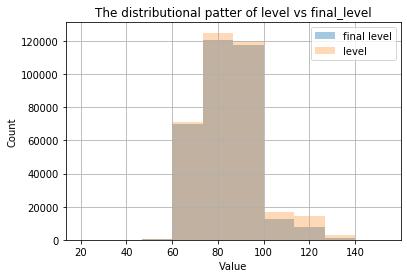

In [194]:
'''plot the values in order to understand distribution pattern'''

level.final_level.hist(alpha=0.4, label="final level")
level.level.hist(alpha=0.3, label="level")
plt.title("The distributional patter of level vs final_level")
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend();

#so, the both values are highly correlated

In [29]:
level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350784 entries, 0 to 350783
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         350784 non-null  datetime64[ns]
 1   level        350784 non-null  float64       
 2   final_level  329984 non-null  float64       
 3   missed       350784 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 10.7 MB


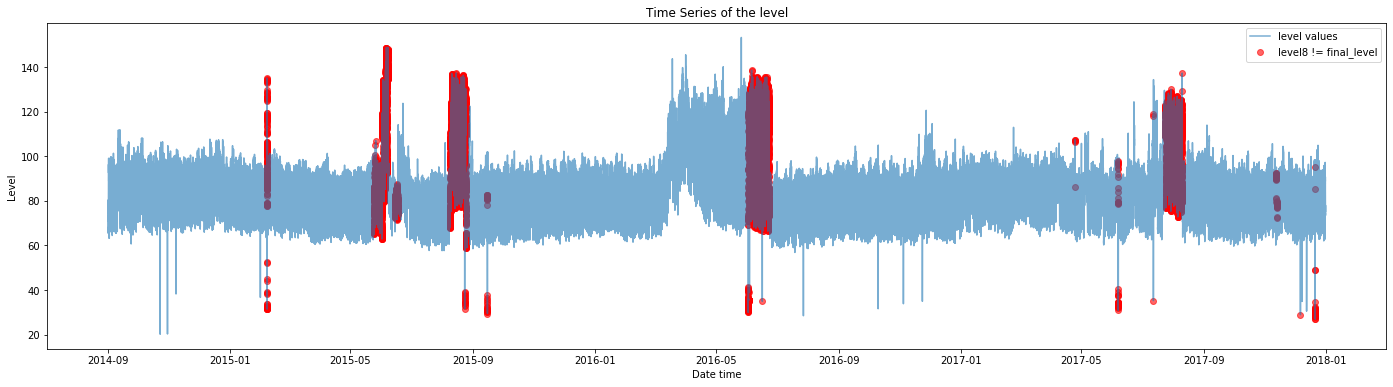

In [196]:
'''plot initial values with possible data loss or inconsistency'''
# level, total data

#pd.plotting.register_matplotlib_converters()  # needed to plot timestamps


plt.subplots(figsize=(24,6))

plt.plot(level.time, level.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=level[level.level != level.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level8 != final_level", alpha=0.6)

plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level');
plt.legend(loc="best")
plt.show()

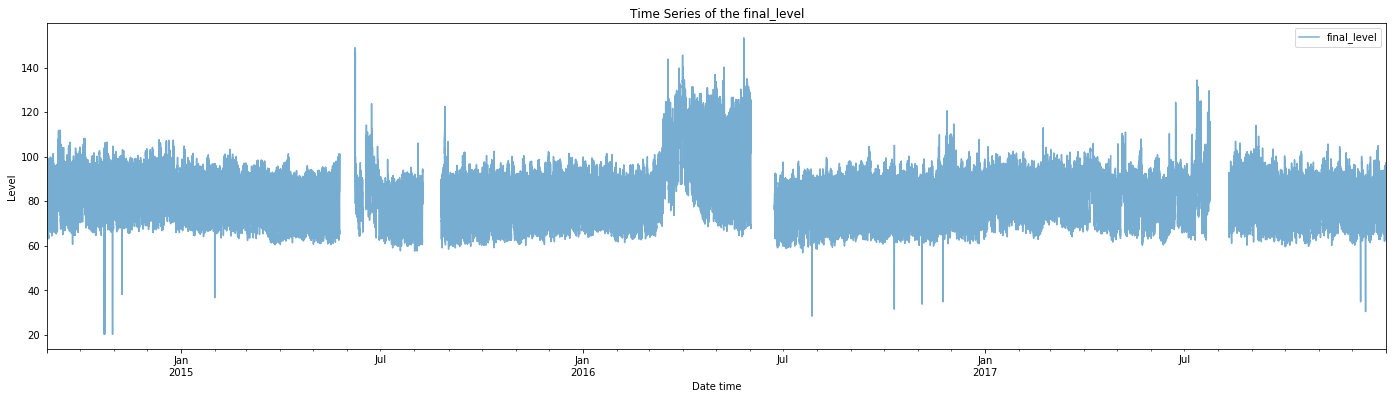

In [90]:
'''plot initial values'''
# final_level

level.plot(x='time', y='final_level', alpha=.6, figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Final Level')
plt.title('Time Series of the final_level');

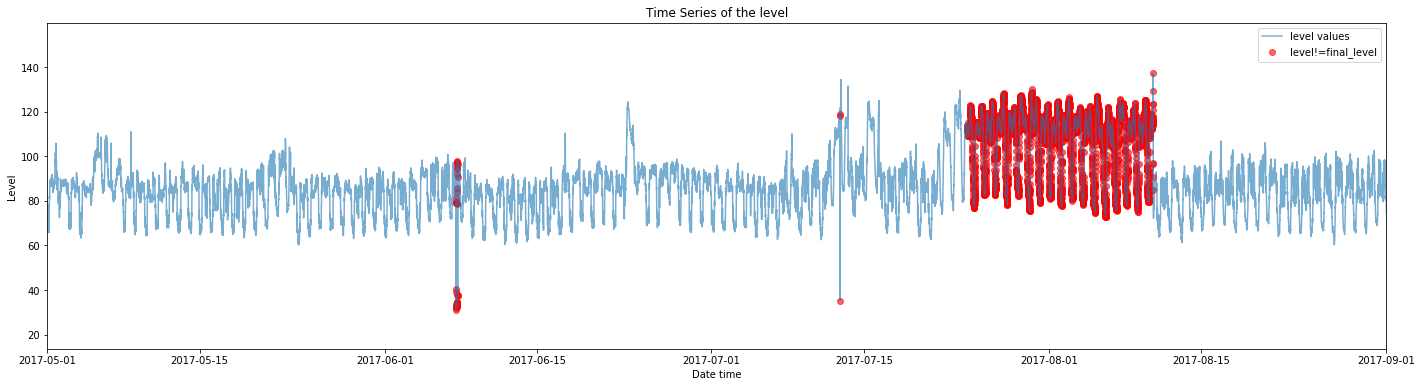

In [110]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 3 random months, where level!=final_level'''
# level

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(level.time, level.level,  alpha=0.6, label="level values")

plt.scatter(x='time', y='level', data=level[level.level!=level.final_level], 
             marker="o", color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2017-05-01 00:00:00','2017-09-01 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level')
plt.legend(loc="best");

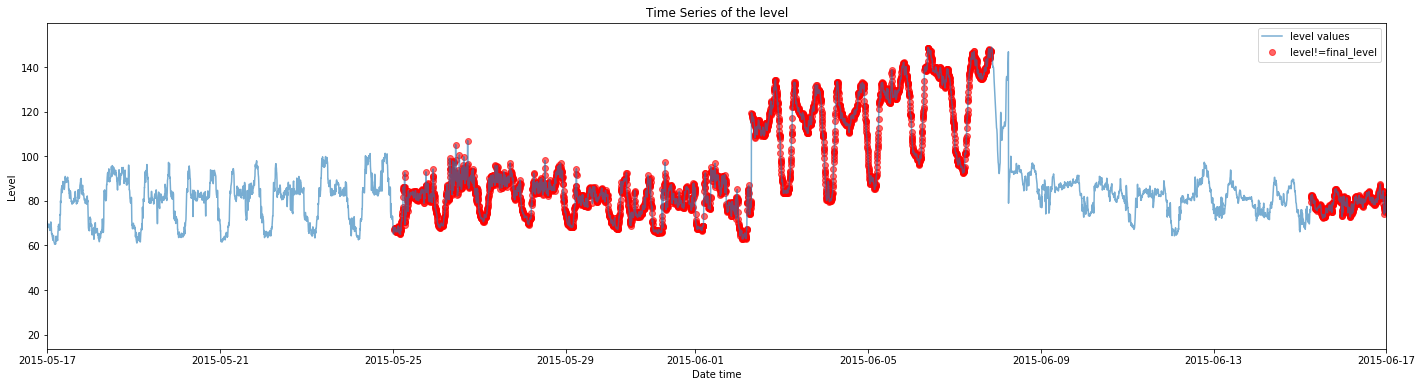

In [111]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month, where level!=final_level'''
# level

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(level.time, level.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=level[level.level!=level.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2015-05-17 00:00:00','2015-06-17 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level')
plt.legend(loc="best");

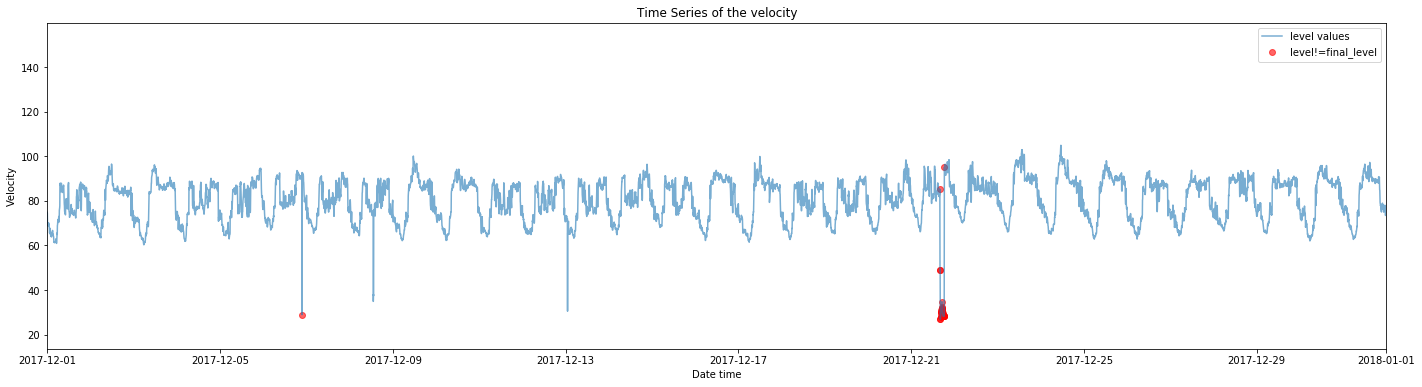

In [197]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random month, where level!=final_level'''
# level

pd.plotting.register_matplotlib_converters()  # needed to plot timestamps
plt.subplots(figsize=(24,6))

plt.plot(level.time, level.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=level[level.level!=level.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2017-12-01 00:00:00','2015-06-17 00:00:00')
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level')
plt.legend(loc="best");

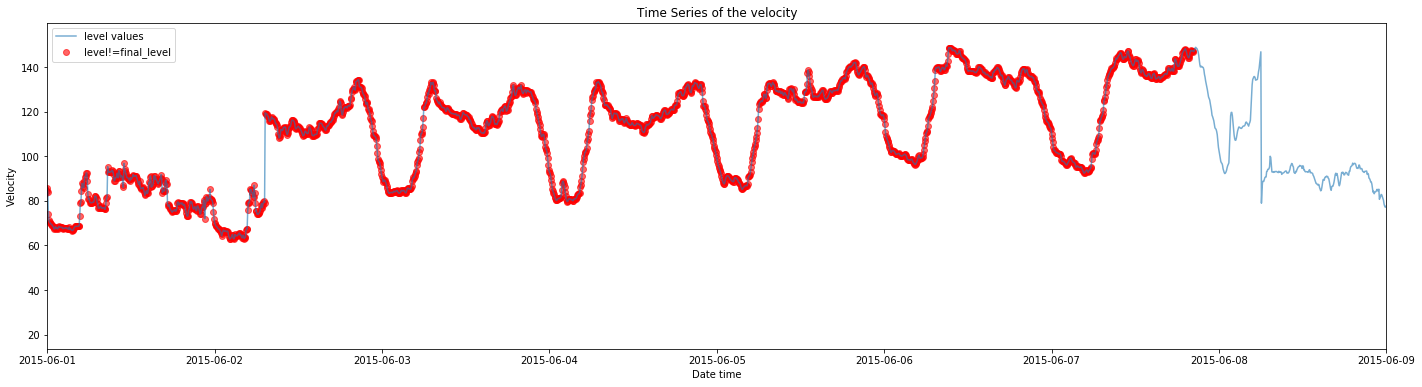

In [199]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where level!=final_level'''
# level

plt.subplots(figsize=(24,6))

plt.plot(level.time, level.level, 
         alpha=0.6, 
         label="level values")

plt.scatter(x='time', y='level', data=level[level.level!=level.final_level], 
            #linestyle='none', 
             marker="o",
            color='red', label="level!=final_level", alpha=0.6)
plt.xlim('2015-06-01 00:00:00','2015-06-09 00:00:00');
plt.xlabel('Date time')
plt.ylabel('Velocity')
plt.title('Time Series of the velocity')
plt.legend(loc="best");

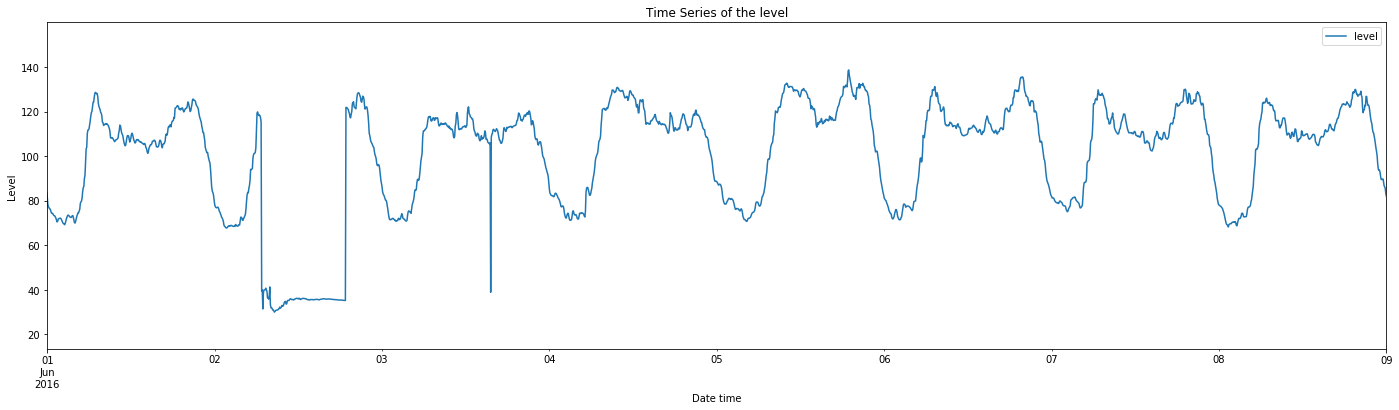

In [115]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where level!=final_level'''
# level

level.plot(x='time', y='level', figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level');
plt.xlim('2016-06-01 00:00:00','2016-06-09 00:00:00');

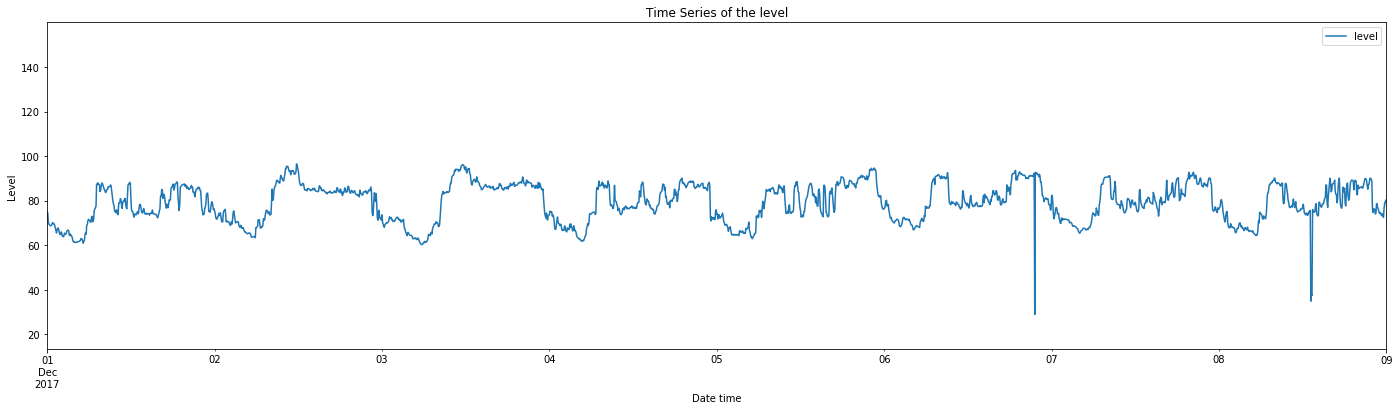

In [100]:
'''plot initial values with possible data loss or inconsistency'''
'''detailed view, 1 random week, where level!=final_level'''
# level

level.plot(x='time', y='level', figsize=(24,6))
plt.xlabel('Date time')
plt.ylabel('Level')
plt.title('Time Series of the level');
plt.xlim('2017-12-01 00:00:00','2017-12-09 00:00:00');

#### Seasonal trends<a name="step2"></a>

In [201]:
#extract seasonal info from the date
level['month'] = level.time.dt.month
level['day'] = level.time.dt.day
level['year'] = level.time.dt.year
level['wday'] = level.time.dt.day_name()
level['hour'] = level.time.dt.hour
level.head()

,time,level,final_level,missed,month,day,year,wday,hour
0,2014-09-01 00:00:00,74.529999,74.529999,0,9,1,2014,Monday,0
1,2014-09-01 00:05:00,75.029999,75.029999,0,9,1,2014,Monday,0
2,2014-09-01 00:10:00,74.300003,74.300003,0,9,1,2014,Monday,0
3,2014-09-01 00:15:00,74.309998,74.309998,0,9,1,2014,Monday,0
4,2014-09-01 00:20:00,80.050003,80.050003,0,9,1,2014,Monday,0


In [204]:
#extract holidays for Canada and save into df  

# Select country 
ca_holidays = holidays.CA() 
  
# create df with holidays
CA_holidays= []
for ptr in holidays.CA(years = [2014,2015,2016,2017]).items(): 
    CA_holidays.append(ptr)
CA_holidays_df = pd.DataFrame(CA_holidays, columns=["data", "holidays"])
CA_holidays_df['data'] = pd.to_datetime(CA_holidays_df['data'])

CA_holidays_df.dtypes, CA_holidays_df.head()

(data        datetime64[ns]
 holidays            object
 dtype: object,         data        holidays
 0 2016-01-01  New Year's Day
 1 2016-02-15      Family Day
 2 2016-03-25     Good Friday
 3 2016-05-23    Victoria Day
 4 2016-07-01      Canada Day)

In [205]:
#merge level df with holidays df
level = level.merge(CA_holidays_df[["data", "holidays"]], left_on="time",
    right_on="data", how='left' )
level.head()

,time,level,final_level,missed,month,day,year,wday,hour,data,holidays
0,2014-09-01 00:00:00,74.529999,74.529999,0,9,1,2014,Monday,0,2014-09-01,Labour Day
1,2014-09-01 00:05:00,75.029999,75.029999,0,9,1,2014,Monday,0,NaT,NaN
2,2014-09-01 00:10:00,74.300003,74.300003,0,9,1,2014,Monday,0,NaT,NaN
3,2014-09-01 00:15:00,74.309998,74.309998,0,9,1,2014,Monday,0,NaT,NaN
4,2014-09-01 00:20:00,80.050003,80.050003,0,9,1,2014,Monday,0,NaT,NaN


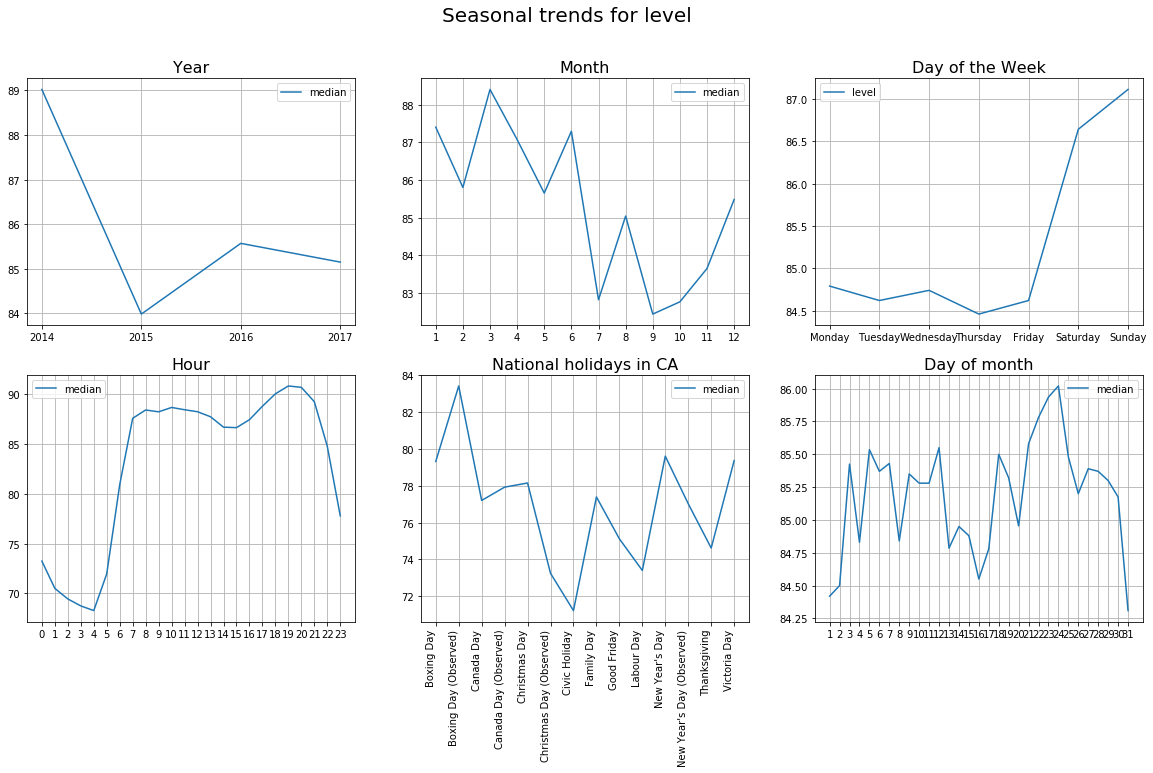

In [206]:
'''Plot seasonal trends for level'''


fig, axs = plt.subplots(figsize=(20,10),nrows=2, ncols=3)#, sharey=True)                                   
plt.suptitle("Seasonal trends for level", fontsize=20)

level.level.groupby(level.year).median().rename('median').plot( legend=True,ax=axs[0][0])
axs[0][0].set_title("Year", fontsize=16, loc='center')
axs[0][0].set_xticks([2014,2015,2016,2017])

level.level.groupby(level.month).median().rename('median').plot(legend=True,ax=axs[0][1])
axs[0][1].set_title("Month", fontsize=16, loc='center')
axs[0][1].set_xticks(np.arange(start=1, stop=13, step=1))


level.level.groupby(level.wday, sort = False).median().plot(legend=True,ax=axs[0][2])
axs[0][2].set_title("Day of the Week", fontsize=16, loc='center')

level.level.groupby(level.hour).median().rename('median').plot(legend=True, ax=axs[1][0])
axs[1][0].set_title("Hour", fontsize=16, loc='center')
axs[1][0].set_xticks(np.arange(start=0, stop=24, step=1))

level.level.groupby(level.holidays).median().rename('median').plot(legend=True, ax=axs[1][1])
axs[1][1].set_title("National holidays in CA", fontsize=16, loc='center')
axs[1][1].set_xticks(np.arange(14))
axs[1][1].set_xticklabels(list(level.level.groupby(level.holidays).median().rename('median').index), 
                          rotation = 90, ha="right")

level.level.groupby(level.day).median().rename('median').plot(legend=True, ax=axs[1][2])
axs[1][2].set_title("Day of month", fontsize=16, loc='center')
axs[1][2].set_xticks(np.arange(start=1, stop=32, step=1))

for ax in axs.flat:
    ax.set(ylabel='', xlabel="")
    ax.grid(which='major')
    #ax.xaxis.grid()
    ax.legend(loc="best");

**Conclusions:**

- The data collected for the period from 2014-09-01 to 2017-12-31, and recorded regilary each 5 min.

- There are no missing values in the 'level', and 6% of missing data in 'final_level'. I would use 'level' for anomaly detection and prediction.

- The 'level' values are varying within wide limits, which are varying during the whole issued period, months, day of week, day of month, within national holidays and withing a day (24h). There are complex seasonal trends, which need to take into account with future modeling.
